# Notas sobre procesamiento digital de señales aplicado al análisis de vibraciones mecánicas

## Elaborado por Mag. Luis Sánchez Céspedes

In [38]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft,ifft
from scipy import signal

np.random.seed(1)
plt.style.use('classic')

In [39]:
def get_frequency_domain(series):
    series_fft = abs(np.fft.fft(series))
    series_fft_half = series_fft[0:int(len(series)//2)]

    return series_fft_half

def load_data(file_path="") -> str:
    input_data = np.genfromtxt(file_path, delimiter=",")
    thisdict = {}
    thisdict['input_data'] = {"data":input_data.tolist()}
    return json.dumps(thisdict)

def get_hilbert_transform(data):
    n = len(data)
    X = fft(data)
    H = np.zeros(n)

    if n % 2 == 0:
        H[0]=1
        H[1:n//2]=2
    else:
        H[0]=1
        H[1:(n+1)//2]=2

    H[(n//2)+1:]=0
    X_hat = X * H

    return ifft(X_hat)

def get_analytic_signal(data):
    return data + 1j * get_hilbert_transform(data)

def get_amplitude_envelope(analytic_signal):
    return np.abs(analytic_signal)

def get_instantaneous_phase(analytic_signal):
    return np.angle(analytic_signal)

def get_intantaneous_frequency(instantaneous_phase, sampling_rate=50000):
    return np.diff(instantaneous_phase)*(sampling_rate/(2.0*np.pi))

# 1. Transformada Discreta de Fourier (DFT)

La Transformada Discreta de Fourier en su forma exponencial se define como

$$
\begin{align}
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i2\pi\frac{n}{N}}
\end{align}
$$

- La frecuencia es discreta, finita y está representada por la letra k
- El tiempo es discreto, finito y está representado por la letra n

Gracias a la formula de Euler

$$
\begin{align}
e^{i\theta} = \cos\theta + i\sin\theta
\end{align}
$$

Podemos representar DFT en forma polar

$$
\begin{align}
X_k = \sum_{n=0}^{N-1} x_n [\cos{i2\pi\frac{n}{N}} -i\sin{2\pi\frac{n}{N}}]
\end{align}
$$

Donde la parte real es

$$
\begin{align}
Re_{X_k} = \sum_{n=0}^{N-1} x_n [\cos{i2\pi\frac{n}{N}}]
\end{align}
$$

Y la imaginaria es

$$
\begin{align}
Im_{X_k} = \sum_{n=0}^{N-1} x_n [-i\sin{2\pi\frac{n}{N}}]
\end{align}
$$


In [68]:
file_path = 'D:\\Datos\\full\\underhang\\ball_fault\\0g\\13.1072.csv'

In [41]:
input_data = np.genfromtxt(file_path, delimiter=",")

In [42]:
df = pd.read_csv(file_path)

In [43]:
type(input_data)

numpy.ndarray

In [44]:
data = input_data[:,7][:50000]

In [45]:
signal_fft = get_frequency_domain(data)

In [46]:
raw_fft = np.fft.fft(data)
raw_freq = np.fft.fftfreq(data.shape[0], d=1/data.shape[0])

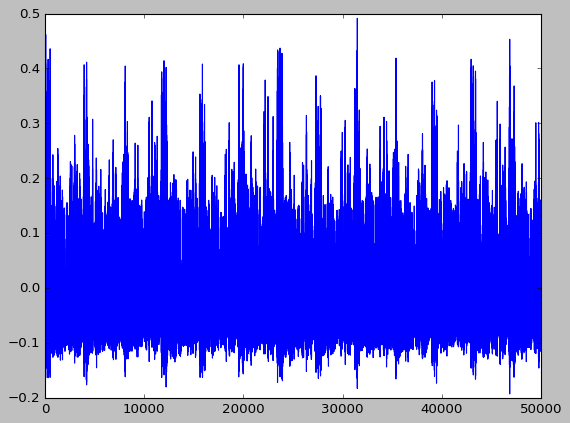

In [47]:
plt.plot(data)

## 1.1. Aliasing

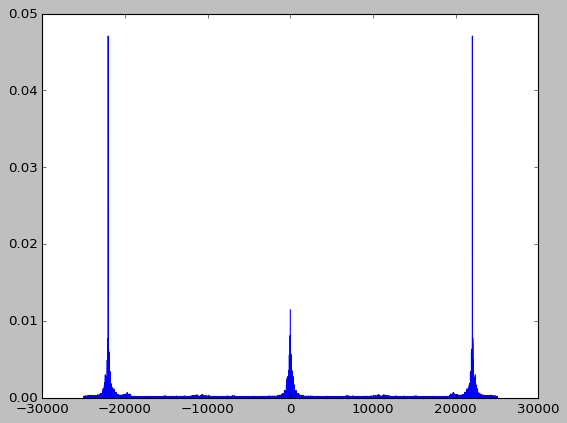

In [48]:
plt.plot(raw_freq, abs(raw_fft)/data.shape[0])

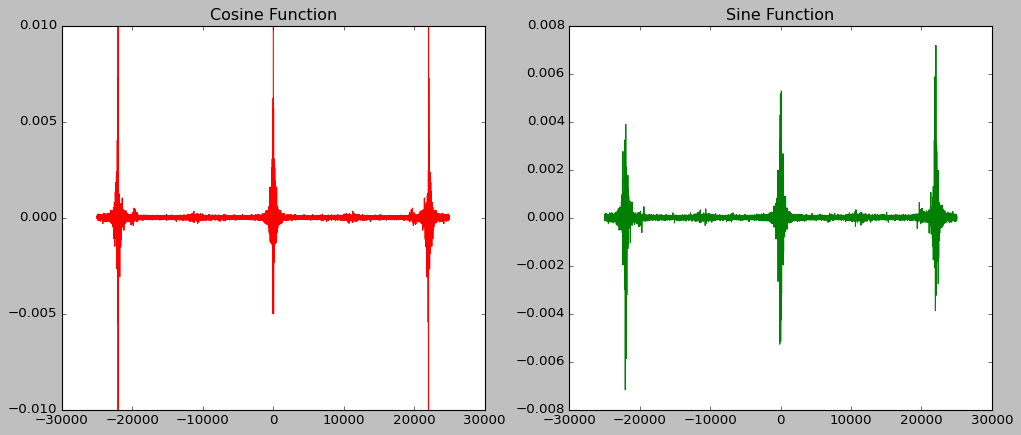

In [82]:
fig, axis = plt.subplots(1, 2)
fig.set_figwidth(15)
axis[0].plot(raw_freq, raw_fft.real/data.shape[0], 'r')
axis[0].set_ylim([-0.01, 0.01])
axis[0].set_title("Cosine Function")

# For Cosine Function
axis[1].plot(raw_freq, raw_fft.imag/data.shape[0], 'g')
axis[1].set_title("Sine Function")
plt.show() 

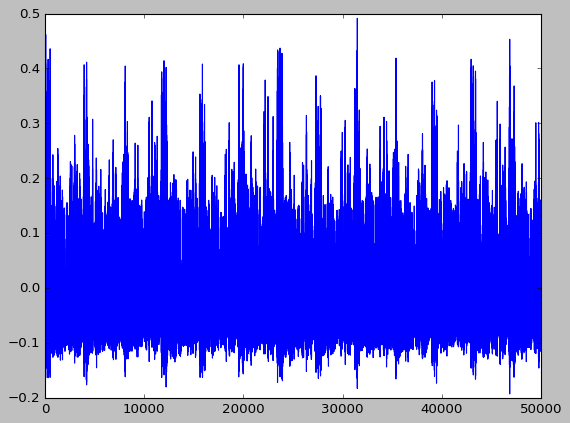

In [50]:
plt.plot(data)

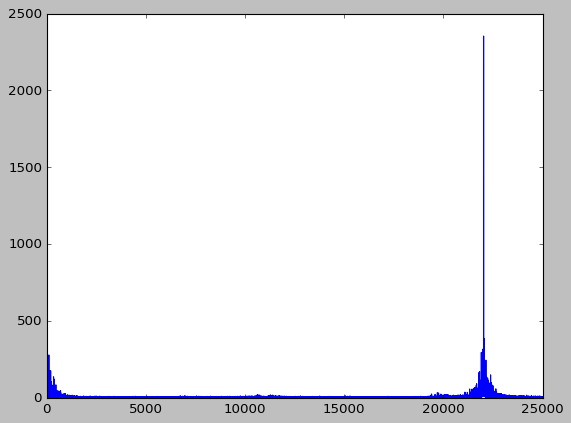

In [51]:
plt.plot(signal_fft)

# 2. Transformada de Hilbert

 $$
 \begin{align}
  H({\omega}) =
    \begin{cases}
      1, & \omega > 0\\
      0, & \omega = 0\\
      -1, & \omega < 0
    \end{cases}       
\end{align}
$$

Numericamente y usando la transforma discreta de Fourier se aproxima la transformada de Hilbert con los siguientes valores

 $$
 \begin{align}
  H({\omega}) =
    \begin{cases}
      2, & \omega > 0\\
      0, & \omega = 0\\
      1, & \omega < 0
    \end{cases}       
\end{align}
$$

In [67]:
raw_signal = get_hilbert_transform(data)

c:\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


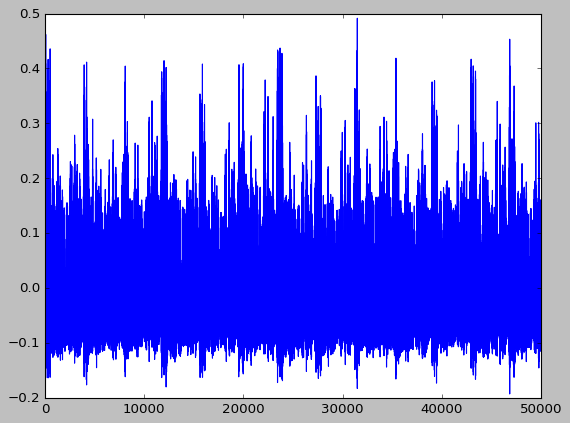

In [53]:
plt.plot(raw_signal)

In [54]:
raw_analytic_signal = get_analytic_signal(data)
envelope = get_amplitude_envelope(raw_analytic_signal)
ip = get_instantaneous_phase(raw_analytic_signal)
ifreq = get_intantaneous_frequency(ip)

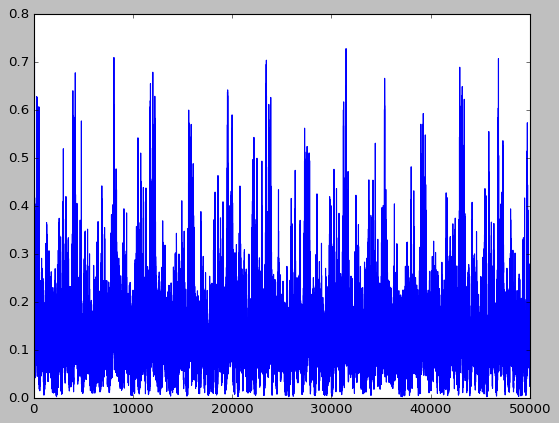

In [55]:
plt.plot(envelope)

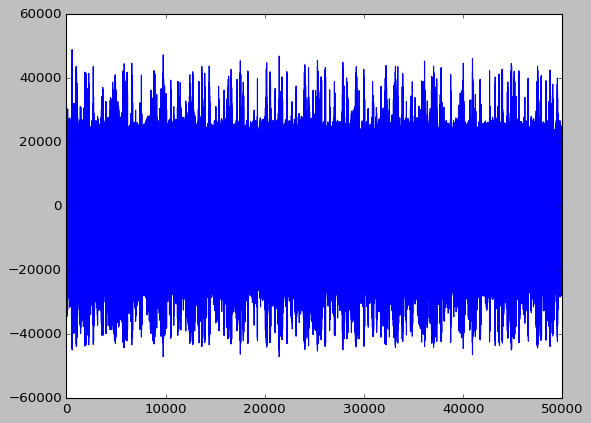

In [56]:
plt.plot(ifreq)

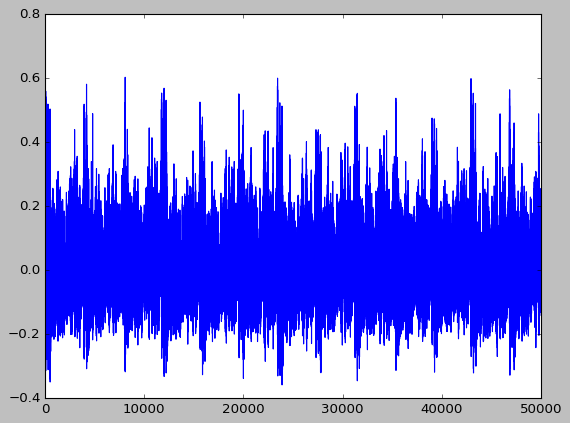

In [57]:
plt.plot(raw_analytic_signal)

# 3. Señal Analítica (Análisis de envolvente)

La señal analítica se define como

$$
\begin{align}
z(t) = s(t) + i \hat{s}(t)
\end{align}
$$

Donde $\hat{s}$ es la transformada de Hilbert

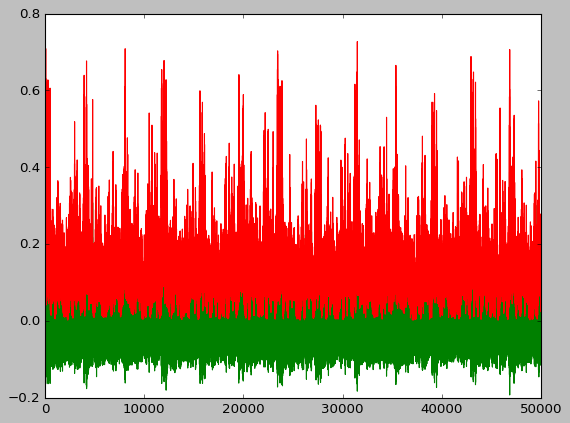

In [58]:
plt.plot(data, 'g')
plt.plot(envelope, 'r')

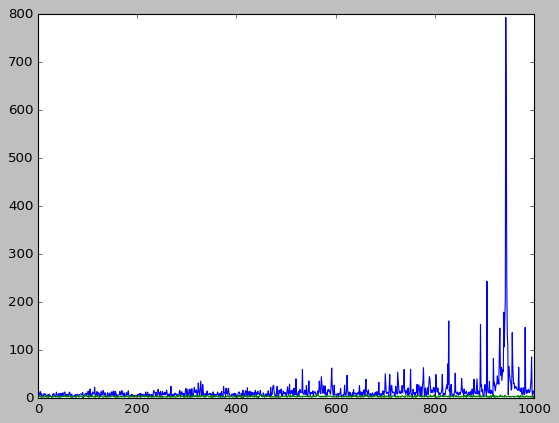

In [59]:
plt.plot(get_frequency_domain(envelope)[5000:6000])
plt.plot(signal_fft[5000:6000])

In [60]:
time = np.linspace(0,1,500, endpoint=False)
sampling_rate = 500
raw_signal = np.sin(2*np.pi*50*time) 
raw_signal = np.sin(2*np.pi*50*time) + 0.5*np.random.randn(500)

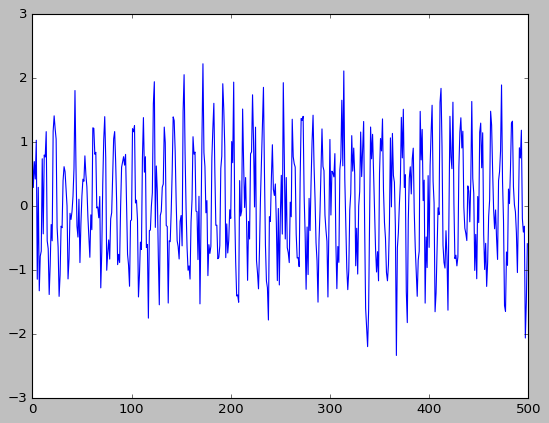

In [61]:
plt.plot(raw_signal)

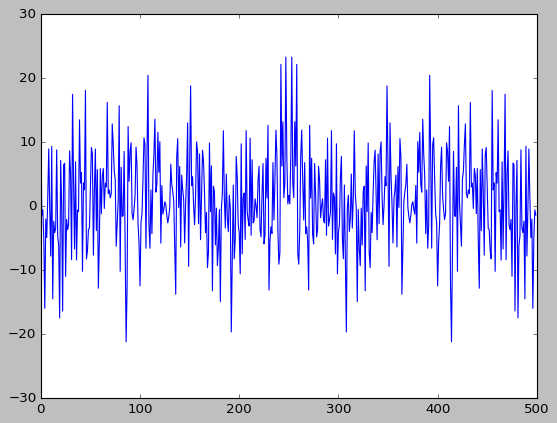

In [62]:
plt.plot(np.fft.fft(raw_signal))

In [63]:
b,a = signal.butter(3, [40, 60], btype='bandpass', fs=sampling_rate)
filtered_signal = signal.lfilter(b, a, raw_signal)

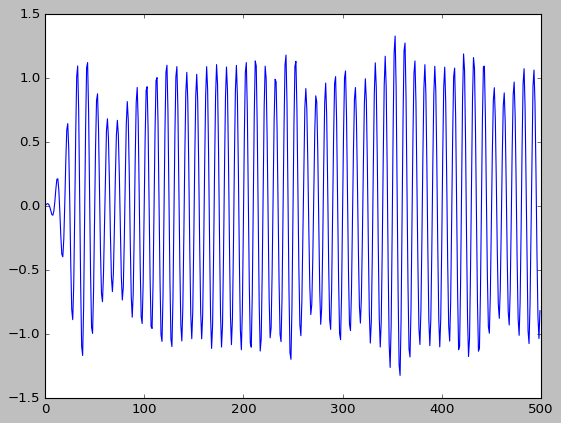

In [64]:
plt.plot(filtered_signal)

In [65]:
raw_analytic_signal = get_analytic_signal(raw_signal)
envelope = get_amplitude_envelope(raw_analytic_signal)
ip = get_instantaneous_phase(raw_analytic_signal)
ifreq = get_intantaneous_frequency(ip)

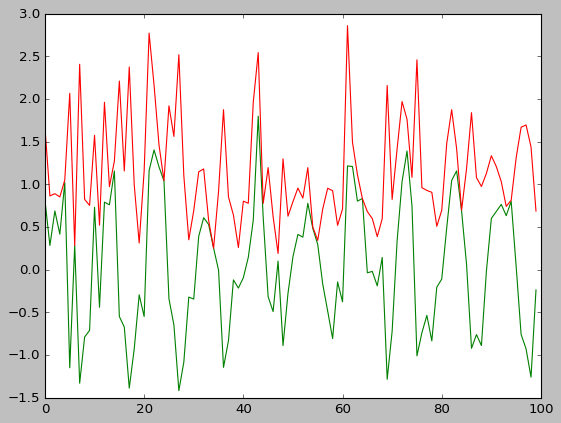

In [66]:
plt.plot(raw_signal[0:100], 'g')
plt.plot(envelope[0:100], 'r')